In [2]:
import pandas as pd

data = pd.read_csv("puchkov.k@phystech.edu.csv", header=None)
data.sample(5)

,0
145,1.0
1375,0.0
2590,0.0
2371,1.0
4832,1.0


In [3]:
data.describe()

,0
count,5000.000000
mean,0.690000
std,0.462539
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


## Оценка вероятности методом максимального правдоподобия

In [4]:
p = data.sum()/len(data)
print('Оценка вероятности методом максимального правдоподобия:', p.round(3)[0])

Оценка вероятности методом максимального правдоподобия: 0.69


## С помощью последовательного анализа проверить нулевую гипотезу $p_0=0.5$ против $p$, полученной методом максимального правдоподобия. Использовать библиотеку $sprt$ с $\alpha=\beta=0.05$. Гипотеза принимается?

Decision:	Reject

      values     lower     upper
n                               
4991  3442.0  2978.221  2985.581
4992  3443.0  2978.819  2986.179
4993  3444.0  2979.416  2986.776
4994  3444.0  2980.014  2987.374
4995  3445.0  2980.611  2987.971
4996  3446.0  2981.208  2988.568
4997  3447.0  2981.806  2989.166
4998  3448.0  2982.403  2989.763
4999  3449.0  2983.001  2990.361
5000  3450.0  2983.598  2990.958


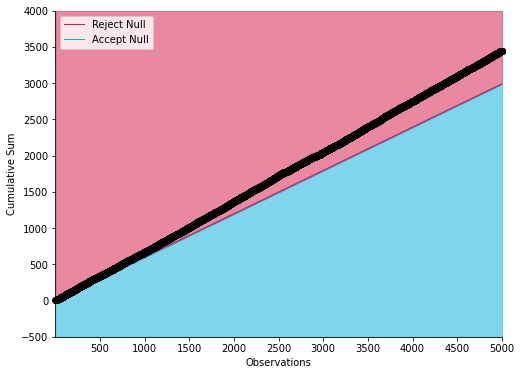

In [24]:
import sprt

alpha = beta = 0.05
test = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=0.5, h1=p[0], values=data.values)
test.plot()

## Какое минимальное количество итераций требуется для вынесения решения по данной гипотезе?

Decision:	Reject

    values   lower   upper
n                         
56    36.0  29.778  37.138
57    37.0  30.375  37.735
58    37.0  30.972  38.332
59    38.0  31.570  38.930
60    39.0  32.167  39.527
61    40.0  32.765  40.125
62    41.0  33.362  40.722
63    42.0  33.960  41.320
64    42.0  34.557  41.917
65    43.0  35.155  42.515


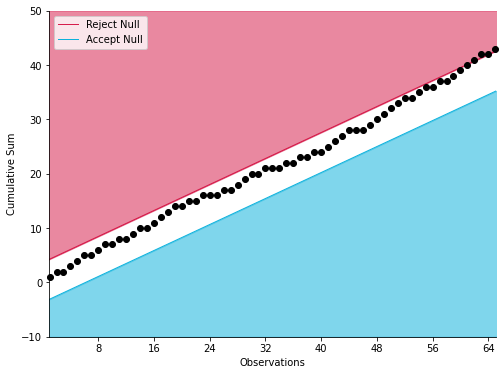

In [32]:
data_new = data[:65]
test = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=0.5, h1=p[0], values=data_new.values)
test.plot()

**Видно, что $value$ превышает $upper$ впервые при $n=62$.**

## Матожидание требуемого количества итераций (можно использовать scipy.optimize.root_scalar). За истинное значение параметра принимать МП-оценку.

In [35]:
def expectation(p, p_0, alpha, beta, h):
    A = (1 - beta)/alpha
    B = beta/(1 - alpha)
    L = (A**h - 1)/(A**h - B**h)
    
    result = (L * np.log(B) + (1 - L) * np.log(A))/ (p * np.log(p/p_0) + (1 - p) * np.log((1 - p)/(1 - p_0)) )
    
    return result

In [40]:
import scipy
import scipy.stats as st

p = data.sum()/len(data)
p_0 = 0.5
alpha = beta = 0.05

def f(x):
    s = (1 - ((1 - p)/(1 - p_0))**x)/((p/p_0)**x - ((1 - p)/(1 - p_0))**x ) - p
    return s

solution = scipy.optimize.root_scalar(f, bracket=[-15, 15], method='brentq')
print(solution)
h = solution.root
print('\n Математическое ожидание числа итераций:', int(expectation(p, p_0, alpha, beta, h)[0]))

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: -1.0000000000000002

 Математическое ожидание числа итераций: 35
